Shapes: (625, 1000) (125, 200)


True

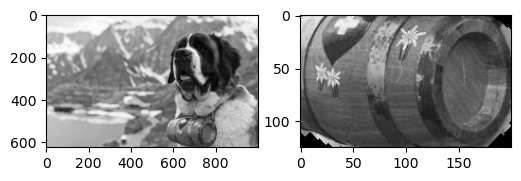

In [28]:
# prepare img and kernel for experiments

import numpy as np
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("./assets/dog.png", cv2.IMREAD_GRAYSCALE)
# img = np.hstack([img, np.zeros((img.shape[0], 1), dtype=np.uint8)])
img = img[:625, :1000]

kernel = cv2.imread("./assets/pattern-to-find.png", cv2.IMREAD_GRAYSCALE)
# kernel = np.hstack([kernel, np.zeros((kernel.shape[0], 1), dtype=np.uint8)]) # (674, 1208)
# kernel = kernel[:, :604]
kernel = kernel[158:, :200]
kernel = kernel[:125, :]

print('Shapes:', img.shape, kernel.shape)

_, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(kernel, cv2.COLOR_BGR2RGB))

# cv2.imwrite("./assets/dog.png", img)
# cv2.imwrite("./assets/pattern-to-find.png", kernel)


In [3]:
import os

def mkdir(path):
  if not os.path.exists(path):
    os.makedirs(path)

def link(src, dst):
  if not os.path.exists(dst):
    os.symlink(src, dst, target_is_directory=True)

FRUTIS_ORIGINAL_PATH = './assets/fruits-360'
FRUITS_SUBSET_PATH = './assets/fruits-360-small'

mkdir('./assets/fruits-360')

classes = [
  'Apple Golden 1',
  'Avocado',
  'Lemon',
  'Mango',
  'Kiwi',
  'Banana',
  'Strawberry',
  'Raspberry'
]

train_path_from = os.path.abspath(f'{FRUTIS_ORIGINAL_PATH}/Training')
valid_path_from = os.path.abspath(f'{FRUTIS_ORIGINAL_PATH}/Test')

train_path_to = os.path.abspath(f'{FRUITS_SUBSET_PATH}/Training')
valid_path_to = os.path.abspath(f'{FRUITS_SUBSET_PATH}/Test')

mkdir(train_path_to)
mkdir(valid_path_to)


for c in classes:
  link(train_path_from + '/' + c, train_path_to + '/' + c)
  link(valid_path_from + '/' + c, valid_path_to + '/' + c)